  show_id     type                             title         director  \
0      s1    Movie              Dick Johnson Is Dead  Kirsten Johnson   
1      s3  TV Show                         Ganglands  Julien Leclercq   
2      s6  TV Show                     Midnight Mass    Mike Flanagan   
3     s14    Movie  Confessions of an Invisible Girl    Bruno Garotti   
4      s8    Movie                           Sankofa     Haile Gerima   

         country date_added  release_year rating  duration  \
0  United States  9/25/2021          2020  PG-13    90 min   
1         France  9/24/2021          2021  TV-MA  1 Season   
2  United States  9/24/2021          2021  TV-MA  1 Season   
3         Brazil  9/22/2021          2021  TV-PG    91 min   
4  United States  9/24/2021          1993  TV-MA   125 min   

                                           listed_in  
0                                      Documentaries  
1  Crime TV Shows, International TV Shows, TV Act...  
2                 TV Dr

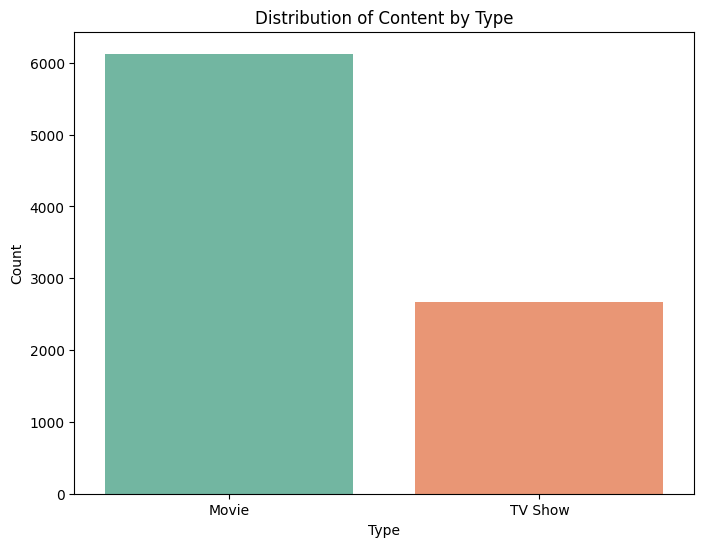

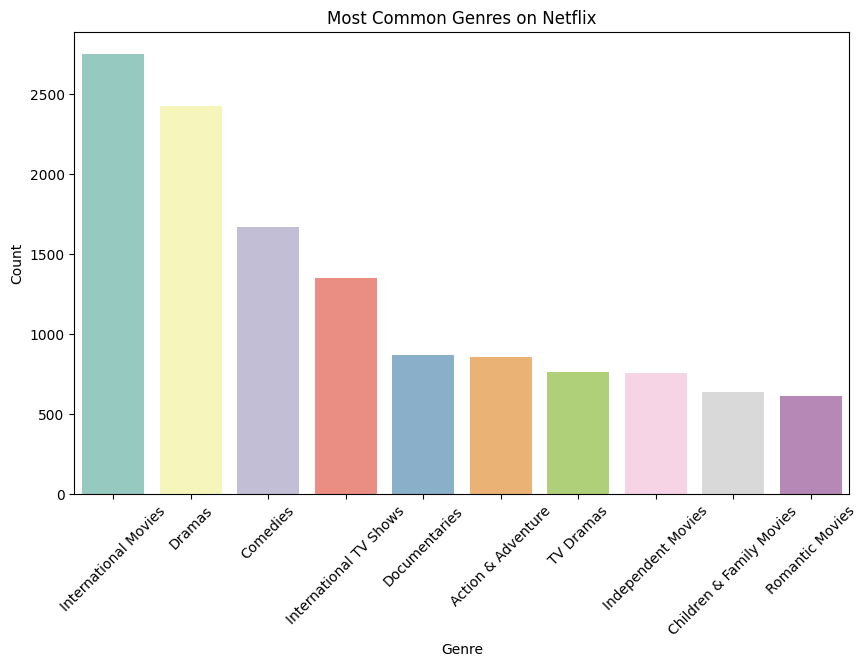

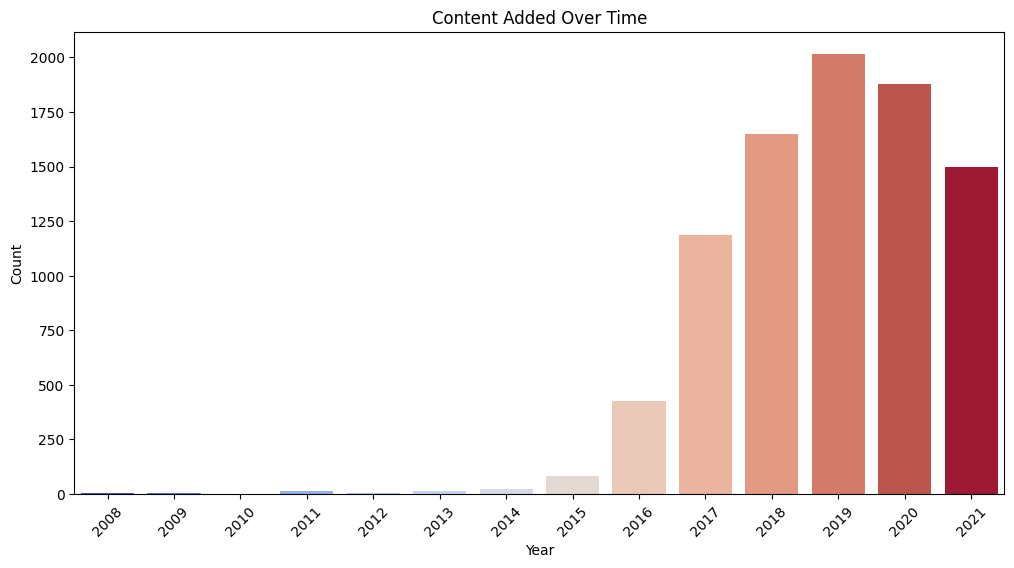

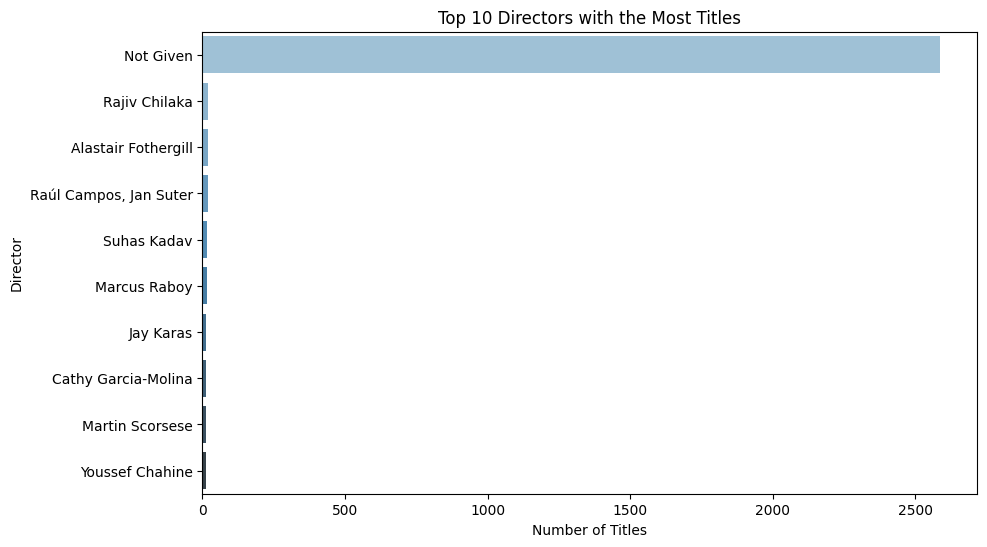

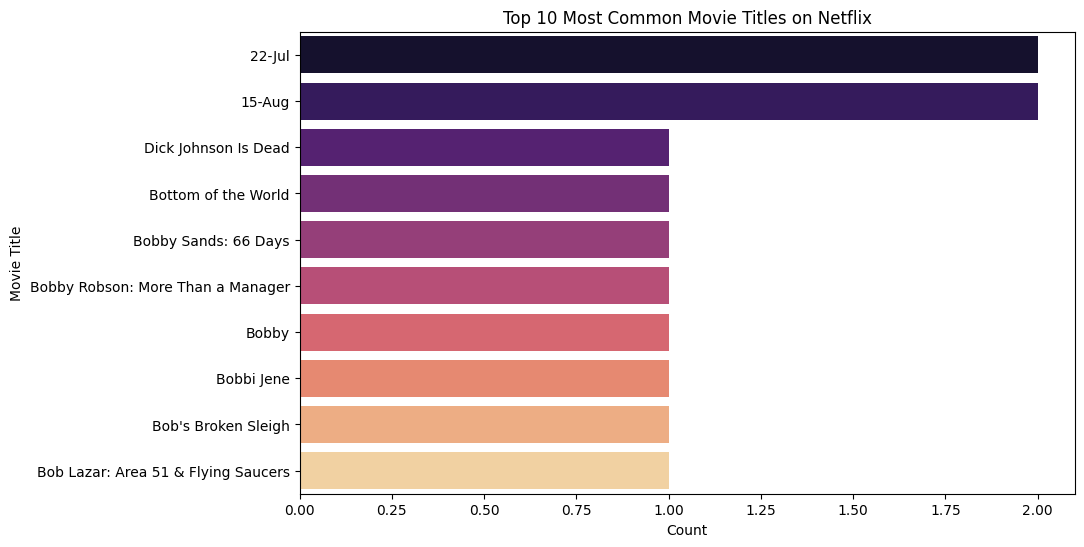

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = "netflix1.csv"
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(data.head())

# Check for missing values
print(data.isnull().sum())

# Drop duplicates if any
data.drop_duplicates(inplace=True)

# Drop rows with missing critical information (only existing columns)
required_columns = [col for col in ['director', 'cast', 'country'] if col in data.columns]
data.dropna(subset=required_columns, inplace=True)

# Convert 'date_added' to datetime if it exists
if 'date_added' in data.columns:
    data['date_added'] = pd.to_datetime(data['date_added'])

# Show data types to confirm changes
print(data.dtypes)

# Content Type Distribution (Movies vs. TV Shows)
if 'type' in data.columns:
    type_counts = data['type'].value_counts()
    plt.figure(figsize=(8, 6))
    sns.barplot(x=type_counts.index, y=type_counts.values, hue=type_counts.index, legend=False, palette='Set2')
    plt.title('Distribution of Content by Type')
    plt.xlabel('Type')
    plt.ylabel('Count')
    plt.show()

# Most Common Genres
if 'listed_in' in data.columns:
    data['genres'] = data['listed_in'].apply(lambda x: x.split(', '))
    all_genres = sum(data['genres'], [])
    genre_counts = pd.Series(all_genres).value_counts().head(10)
    plt.figure(figsize=(10, 6))
    sns.barplot(x=genre_counts.index, y=genre_counts.values, hue=genre_counts.index, legend=False, palette='Set3')
    plt.title('Most Common Genres on Netflix')
    plt.xlabel('Genre')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

# Content Added Over Time
if 'date_added' in data.columns:
    data['year_added'] = data['date_added'].dt.year
    data['month_added'] = data['date_added'].dt.month
    plt.figure(figsize=(12, 6))
    sns.countplot(x='year_added', data=data, hue='year_added', legend=False, palette='coolwarm')
    plt.title('Content Added Over Time')
    plt.xlabel('Year')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

# Top 10 Directors with the Most Titles
if 'director' in data.columns:
    top_directors = data['director'].value_counts().head(10)
    plt.figure(figsize=(10, 6))
    sns.barplot(x=top_directors.values, y=top_directors.index, hue=top_directors.index, legend=False, palette='Blues_d')
    plt.title('Top 10 Directors with the Most Titles')
    plt.xlabel('Number of Titles')
    plt.ylabel('Director')
    plt.show()

# Horizontal bar plot of the top 10 most common movie titles
if 'title' in data.columns and 'type' in data.columns:
    movie_title_counts = data[data['type'] == 'Movie']['title'].value_counts().head(10)
    plt.figure(figsize=(10, 6))
    sns.barplot(x=movie_title_counts.values, y=movie_title_counts.index, hue=movie_title_counts.index, legend=False, palette='magma')
    plt.title('Top 10 Most Common Movie Titles on Netflix')
    plt.xlabel('Count')
    plt.ylabel('Movie Title')
    plt.show()
